# How to tell a story - restaurants

### Table of Contents

* [Preparing data](#chapter1)
* [Establishments and chains](#chapter2)
    * [Proportions of establishments types](#section_2_1)
    * [Chain proportions](#section_2_2)
    * [Chain establishments type](#section_2_3)
    * [Characterizing chains](#section_2_4)
    * [Average number of seats](#section_2_5)
* [addresses analysis](#chapter3)
    * [street column cleaning](#section_3_1)
    * [Top ten streets](#section_3_2)
    * [Streets with one establishment](#section_3_3)
    * [Busy streets seats distribution](#section_3_4)
* [Conclusion](#chapter4)   


# Introduction

We plan to open a new small robot-run cafe in Los Angeles. For that reason we will study about Los Angeless restaurants and their properties. We will prepare market research to reach that goal .

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
# Standard plotly imports
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
#import cufflinks
#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
import squarify
import re
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Preparing data <a class="anchor" id="chapter1"></a>

In [3]:
#/datasets/rest_data_us.csv
df = pd.read_csv('rest_data_us.csv')

In [4]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
df.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


In [6]:
df['object_name'] = df['object_name'].str.lower()
df['address'] = df['address'].str.lower()

In [7]:
df.shape

(9651, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


So far we have seen that our data contains six columns and 9651 rows.
The "chain" columns has missing values. We will not change this because the volume of the missing values is about 0.03% of the data we have. In addition, the data within the columns was in uppercase, we change it to lowercase for convenience.

In [9]:
df.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


It seems there are outliers in the number column . The average number of seats are 43 but the median is only 27. In addition that 75% of the "population" are 46 seats and the maximum value of seats is 229 that is a large number when compering the rest number of seats in restaurants. 
Let's check the percentiles and distribution to get more information. 

<AxesSubplot:>

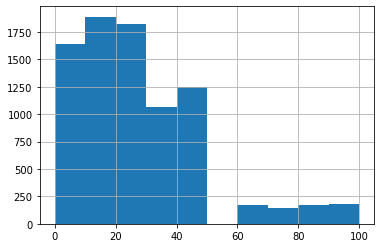

In [10]:
df['number'].hist(range=(0,100))

It seems there are no restaurans with 50-60 tables. There are outliers ufter the value 50 . 

In [11]:
print(np.percentile(df['number'], [95, 97.5, 99]))

[148. 189. 214.]


There are large jumps between the percintiles. 

In [12]:
df.describe(include='all')

,id,object_name,address,chain,object_type,number
count,9651.000000,9651,9651,9648,9651,9651.000000
unique,NaN,8672,8513,2,6,NaN
top,NaN,the coffee bean & tea leaf,3607 trousdale pkwy,False,Restaurant,NaN
freq,NaN,47,11,5972,7255,NaN
mean,16611.000000,NaN,NaN,NaN,NaN,43.695161
std,2786.148058,NaN,NaN,NaN,NaN,47.622874
min,11786.000000,NaN,NaN,NaN,NaN,1.000000
25%,14198.500000,NaN,NaN,NaN,NaN,14.000000
50%,16611.000000,NaN,NaN,NaN,NaN,27.000000
75%,19023.500000,NaN,NaN,NaN,NaN,46.000000


It seems that the cofee "the coffee bean & tea leaf	" is the greater chain. In addition, The addredd whith the largest number of cafe/restaurant is the "3607 trousdale pkwy" street.

In [13]:
df.duplicated().sum()

0

There are no duplicates in our data frame . 

# Data analysis - establishments and chains <a class="anchor" id="chapter2"></a>

##  Investigation proportions of various types of establishments <a class="anchor" id="section_2_1"></a>

In [14]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20


In [15]:
type_val = df['object_type'].value_counts().reset_index()
type_val['percent'] = (type_val['object_type'] / type_val['object_type'].sum() *100).round()
prcnt = type_val[['index', 'percent']]
prcnt = prcnt.rename(columns = {'index':'object_type'})
prcnt

,object_type,percent
0,Restaurant,75.0
1,Fast Food,11.0
2,Cafe,5.0
3,Pizza,3.0
4,Bar,3.0
5,Bakery,3.0


Text(0.5, 1.0, 'establishments type proportion')

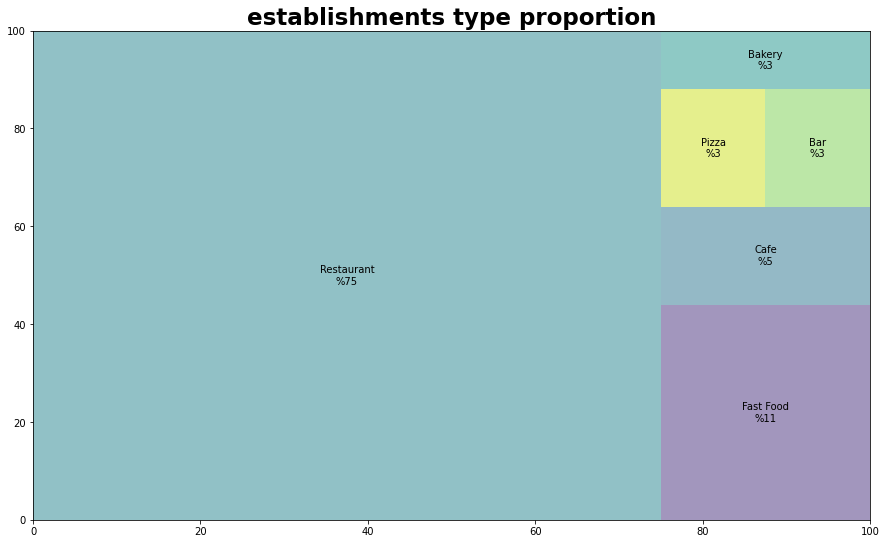

In [16]:
sizes= prcnt.percent.values.tolist()
lables = prcnt.apply(lambda x:str(x[0])+"\n"+"%"+str(round(x[1])),axis=1)

plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes, label=lables, alpha=.5)
plt.title("establishments type proportion",fontsize=23,fontweight="bold")

Most of data establishments are restaurants. 

##   chain types proportions of establishments <a class="anchor" id="section_2_2"></a>

<AxesSubplot:title={'center':'chain types proportions of establishments'}, ylabel='chain'>

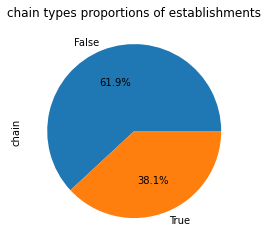

In [17]:
df['chain'].value_counts().plot(kind='pie', title='chain types proportions of establishments', autopct='%1.1f%%')

There are 61.9% non chain establishments and 38.1% chain establishments.

##   Which type of establishment is a chain <a class="anchor" id="section_2_3"></a>

In [18]:
# count all values in the type column
type_val = type_val[['index', 'object_type']]
type_val = type_val.rename(columns={'index':'object_type', 'object_type':'cnt'})
type_val

,object_type,cnt
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


In [19]:
#count type values in chain=true
chain_true_val = df[df['chain']==True]['object_type'].value_counts().reset_index()
chain_true_val = chain_true_val.rename(columns={'index':'object_type', 'object_type':'cnt_chain_yes'})
chain_true_val

,object_type,cnt_chain_yes
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


In [20]:
#merging chain_true_val and group_val columns
chain_true = chain_true_val.merge(type_val, on='object_type')
chain_true

,object_type,cnt_chain_yes,cnt
0,Restaurant,2292,7255
1,Fast Food,605,1066
2,Bakery,283,283
3,Cafe,266,435
4,Pizza,153,320
5,Bar,77,292


In [21]:
#calculating the percent of chain establishmemnts
chain_true['prcnt'] = (chain_true['cnt_chain_yes'] / chain_true['cnt'] *100).round()
chain_true

,object_type,cnt_chain_yes,cnt,prcnt
0,Restaurant,2292,7255,32.0
1,Fast Food,605,1066,57.0
2,Bakery,283,283,100.0
3,Cafe,266,435,61.0
4,Pizza,153,320,48.0
5,Bar,77,292,26.0


All the bakeries are actually a part of a chain. 

In [22]:
chain_true = chain_true.set_index('object_type')

Text(0, 0.5, 'chain percent')

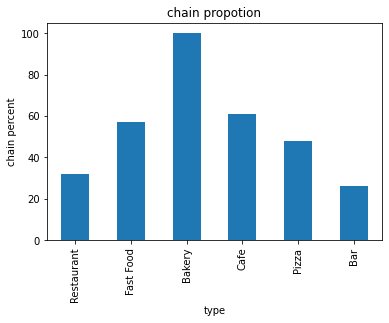

In [23]:
#proportion
chain_true['prcnt'].plot(kind='bar',x='object_type', y='prcnt', title='chain propotion')
plt.xlabel('type')
plt.ylabel('chain percent')

We calculated the ratio between the establishments that are in chain with all the establishments. With the help of the pie graph we can get a picture of the ranking of the restaurants according to the ratio we examined. All the bakeries are part of a chain. In addition cafe and fast food establishment tend to be in chain. 

##   Characterizing chains on average number of seats <a class="anchor" id="section_2_4"></a>

In [24]:
above_1 = df[df['chain']==True]['object_name'].value_counts().reset_index()
above_1 = above_1[above_1['object_name'] > 1]['index']


In [25]:
chain = df.query('object_name in @above_1')

First of all we need to clean the data. We will use establishments that are part of a chain. There seem to be chains that consist only one establishment. Is this still a chain? It was decided to clean these institutions and use institutions over 2 branches.

In [26]:
chain.head()

,id,object_name,address,chain,object_type,number
8,11794,abc donuts,3027 n san fernando rd unit 103,True,Fast Food,1
10,11796,el pollo loco,5319 w sunset blvd,True,Restaurant,38
27,11813,norm's restaurant,470 n la cienega blvd,True,Restaurant,80
33,11819,ono hawaiian bbq,5539 w sunset blvd,True,Restaurant,35
37,11823,waba grill,7109 w sunset blvd,True,Restaurant,49


In [27]:
#number of seats in each chain 
seats = chain.groupby('object_name')['number'].mean().reset_index()
seats

,object_name,number
0,abc donuts,11.000000
1,aca grill,71.500000
2,angeles bakery,17.000000
3,angelini alimentari,20.000000
4,antigua bread,23.500000
...,...,...
488,yoshinoya # 4124,39.500000
489,yuko kitchen,21.000000
490,yum yum donuts,16.666667
491,z pizza,41.000000


In [28]:
#number of establishment in each chain 
chain_val = chain['object_name'].value_counts().reset_index()
chain_val = chain_val.rename(columns={'index':'object_name', 'object_name':'chain_cnt'})

In [29]:
character = chain_val.merge(seats, on='object_name')
character

,object_name,chain_cnt,number
0,the coffee bean & tea leaf,47,26.723404
1,subway,31,16.419355
2,domino's pizza,15,12.333333
3,kentucky fried chicken,14,33.357143
4,waba grill,14,42.857143
...,...,...,...
488,carthay cafe,2,33.000000
489,food,2,25.000000
490,antigua bread,2,23.500000
491,baja buds,2,37.000000


Text(0, 0.5, 'seats')

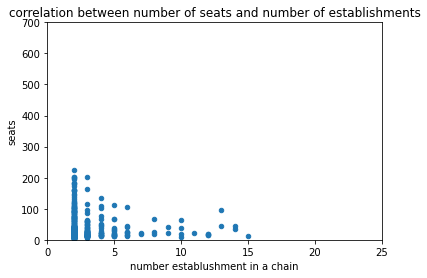

In [30]:
#correlation
(character
 .plot(x='chain_cnt', y='number', 
       kind='scatter', 
       title='correlation between number of seats and number of establishments',
      xlim=(0,25), ylim=(0,700)))

plt.xlabel('number establushment in a chain')
plt.ylabel('seats')

Text(0, 0.5, 'seats')

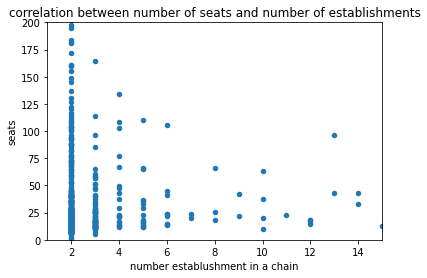

In [31]:
(character
 .plot(x='chain_cnt', y='number', 
       kind='scatter', 
       title='correlation between number of seats and number of establishments',
      xlim=(1,15), ylim=(0,200)))
plt.xlabel('number establushment in a chain')
plt.ylabel('seats')

In [32]:
character['chain_cnt'].corr(character['number'])

-0.04210009790863128

There is no correlation between number of establishments and  the number of seats .
When taking a closer look, it seems that the more branches there are for a particular chain, the smaller the number of seats in average.

##   Average number of seats <a class="anchor" id="section_2_5"></a>

In [33]:
s = df.groupby('object_type')['number'].mean().reset_index()
s

,object_type,number
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.459375
5,Restaurant,48.042316


Text(0.5, 1.0, 'average number of seats by establishment type')

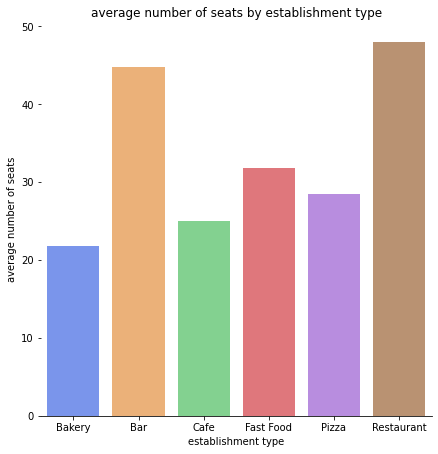

In [34]:
g = sns.catplot(
    data=s, kind="bar",
    x="object_type", y="number",
    ci="sd", palette="bright", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("establishment type", "average number of seats")
plt.title("average number of seats by establishment type")

Restaurants and bars have the highest number of seats

Text(0.5, 1.0, 'number of seats by establishment type between chains and non chains')

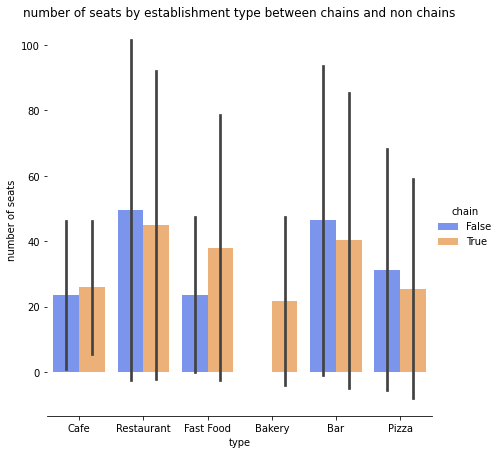

In [35]:
g1 = sns.catplot(
    data=df, kind="bar",
    x="object_type", y="number", hue="chain",
    ci="sd", palette="bright", alpha=.6, height=6
)
g1.despine(left=True)
g1.set_axis_labels("type", "number of seats")
plt.title("number of seats by establishment type between chains and non chains")

There is no big difference between chain and not chain establishments in terms of number of seats. 

# Data analysis - addresses <a class="anchor" id="chapter3"></a>

##   street data cleaning <a class="anchor" id="section_3_1"></a>

In [36]:
df.head(10)

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20
5,11791,the spot grill,10004 national blvd,False,Restaurant,14
6,11792,cpk,100 world way # 126,False,Restaurant,100
7,11793,pho lala,3500 w 6th st ste 226,False,Restaurant,7
8,11794,abc donuts,3027 n san fernando rd unit 103,True,Fast Food,1
9,11795,upstairs,3707 n cahuenga blvd,False,Restaurant,35


In [37]:
def cleaning_st(raw):   
    all = re.findall('[0-9]?[A-z_]+',raw)
    all = ' '.join([i for i in all if not i.isdigit()])  
    return all
df['clean_street']=df.address.apply(cleaning_st)


In [38]:
df.head(60)

,id,object_name,address,chain,object_type,number,clean_street
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26,n eagle rock blvd
1,11787,reilly's,100 world way # 120,False,Restaurant,9,world way
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20,hollywood blvd
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,w sunset blvd
4,11790,pollen,2100 echo park ave,False,Restaurant,20,echo park ave
5,11791,the spot grill,10004 national blvd,False,Restaurant,14,national blvd
6,11792,cpk,100 world way # 126,False,Restaurant,100,world way
7,11793,pho lala,3500 w 6th st ste 226,False,Restaurant,7,w 6th st ste
8,11794,abc donuts,3027 n san fernando rd unit 103,True,Fast Food,1,n san fernando rd unit
9,11795,upstairs,3707 n cahuenga blvd,False,Restaurant,35,n cahuenga blvd


In [39]:
df.groupby('clean_street').count().reset_index().sort_values(by='clean_street').head()

,clean_street,id,object_name,address,chain,object_type,number
0,1st st,3,3,3,3,3,3
1,2nd st d,1,1,1,1,1,1
2,3rd st,6,6,6,6,6,6
3,4th st,1,1,1,1,1,1
4,5th st,1,1,1,1,1,1


In [40]:
def cleaning_final(raw):
    try:
        if raw.startswith('olvera'):
            clean_adress='olvera,los angeles,usa'
        elif raw.startswith('1033 1/2 los angeles'):
            clean_adress='1033 1/2 los angeles st,los angeles,usa'
        else:
            clean_adress = usaddress.tag(raw)[0]['streetName']
    except:
        clean_adress = 'no street'
    return clean_adress

df['clean_street_final']= df.address.apply(cleaning_final)

##   top ten streets by number of establishments <a class="anchor" id="section_3_2"></a>

In [41]:
street = (
    df.groupby(['clean_street', 'object_type'])
    .agg({'id': 'count'})
    .reset_index().sort_values(by='id', ascending=False)
)
street.head(10)

,clean_street,object_type,id
2088,w pico blvd,Restaurant,232
2136,w sunset blvd,Restaurant,232
2271,wilshire blvd,Restaurant,182
528,hollywood blvd,Restaurant,162
1803,w 3rd st,Restaurant,151
1568,s western ave,Restaurant,147
1630,santa monica blvd,Restaurant,144
2062,w olympic blvd,Restaurant,142
1203,s figueroa st,Restaurant,127
1535,s vermont ave,Restaurant,125


In [42]:
#street = street.drop(2032)
#street = street.drop(1640)
#street.head(10)

Here we got the clean data with top 10 streets. Now we caould move forward and make a plot.

Text(0.5, 1.0, 'top 10 street with the highest number of restaurants')

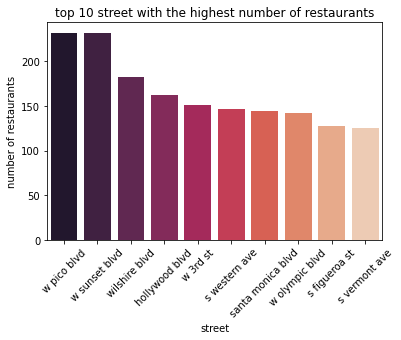

In [43]:
top = street.head(10)
top10 = sns.barplot(x='clean_street', y='id', palette="rocket", data=top)
plt.xticks(rotation='45')
plt.xlabel('street')
plt.ylabel('number of restaurants')
plt.title('top 10 street with the highest number of restaurants')

This graph presents the top ten streets with the highest number of establishments. In addition, there are only restaurants on these streets. (No coffee, fast food or bars) 

##   streets with only 1 establishment <a class="anchor" id="section_3_3"></a>

In [44]:
st_1 = street[street['id']==1]

print('there are {} streets with 1 establishment'.format(len(st_1)))

there are 1508 streets with 1 establishment


##   Distribution of the number of seats in busy streets<a class="anchor" id="section_3_4"></a>

In [45]:
street.head()

,clean_street,object_type,id
2088,w pico blvd,Restaurant,232
2136,w sunset blvd,Restaurant,232
2271,wilshire blvd,Restaurant,182
528,hollywood blvd,Restaurant,162
1803,w 3rd st,Restaurant,151


Text(0.5, 0, 'number of restaurants')

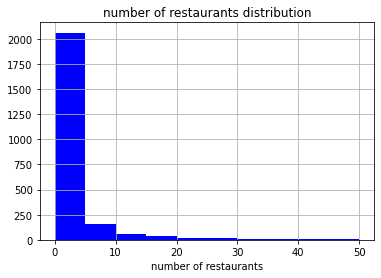

In [46]:
street['id'].hist(range=(0,50), color='blue')
plt.title('number of restaurants distribution')
plt.xlabel('number of restaurants')


We have to make number of seats distribution of the busy streets (with many restaurants in it). Acording this distribution, most of streets have up to 10 restaurants in it. We will use this range. 

In [47]:
st_above = street[street['id']>10]

In [48]:
df

,id,object_name,address,chain,object_type,number,clean_street,clean_street_final
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26,n eagle rock blvd,no street
1,11787,reilly's,100 world way # 120,False,Restaurant,9,world way,no street
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20,hollywood blvd,no street
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,w sunset blvd,no street
4,11790,pollen,2100 echo park ave,False,Restaurant,20,echo park ave,no street
...,...,...,...,...,...,...,...,...
9646,21432,hall of justice,217 w temple ave,False,Restaurant,122,w temple ave,no street
9647,21433,fin-melrose,5750 melrose ave,False,Restaurant,93,melrose ave,no street
9648,21434,juicy wingz,6741 hollywood blvd,True,Fast Food,15,hollywood blvd,no street
9649,21435,medidate coffee,548 s spring st ste 100,False,Cafe,6,s spring st ste,no street


In [49]:
busy = df.query('index in @st_above.index')
busy

,id,object_name,address,chain,object_type,number,clean_street,clean_street_final
79,11865,kettle glazed donuts,6211 franklin ave,False,Fast Food,18,franklin ave,no street
81,11867,ms donuts,1353 glendale blvd,False,Fast Food,28,glendale blvd,no street
111,11897,l.a.a.c.-8th floor snack bar,431 w 7th st,False,Bar,4,w 7th st,no street
158,11944,the porter junction cafe,2350 porter st,False,Restaurant,28,porter st,no street
176,11962,mashti ice cream,1525 n la brea ave,False,Restaurant,16,n la brea ave,no street
...,...,...,...,...,...,...,...,...
2298,14084,busbys,5364 wilshire blvd,False,Restaurant,107,wilshire blvd,no street
2333,14119,el pollo loco # 5502,1934 w olympic blvd,True,Restaurant,48,w olympic blvd,no street
2336,14122,pepes g. tacos,223 w 6th st,False,Fast Food,9,w 6th st,no street
2365,14151,park side int'l college,3771 mcclintock ave,False,Restaurant,166,mcclintock ave,no street


<AxesSubplot:>

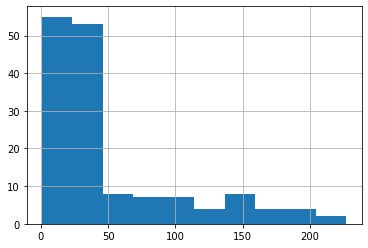

In [50]:
busy['number'].hist()


In [51]:
st_below = street[street['id']<10]
not_busy = df.query('index in @st_below.index').sample(149)
not_busy

,id,object_name,address,chain,object_type,number,clean_street,clean_street_final
1541,13327,mil mul,3608 w 3rd st,False,Restaurant,39,w 3rd st,no street
1890,13676,la burger bar,8581 w pico blvd,False,Fast Food,37,w pico blvd,no street
484,12270,vons market #2077,3118 s sepulveda blvd,False,Restaurant,20,s sepulveda blvd,no street
565,12351,tamales los angeles,710 n eastern ave,False,Restaurant,11,n eastern ave,no street
2176,13962,ocha classic restaurant #5,5187 w sunset blvd,True,Restaurant,35,w sunset blvd,no street
...,...,...,...,...,...,...,...,...
1335,13121,b.a.d. sushi,11617 santa monica blvd,False,Restaurant,40,santa monica blvd,no street
2328,14114,el pollo loco # 3540,1545 s western ave,True,Restaurant,47,s western ave,no street
1189,12975,road to seoul,1230 s western ave,False,Restaurant,192,s western ave,no street
2017,13803,spain restaurant,1866 n glendale blvd,True,Restaurant,31,n glendale blvd,no street


<AxesSubplot:>

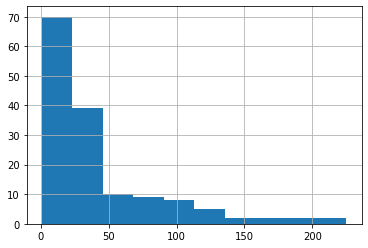

In [52]:
not_busy['number'].hist()

In [53]:
from scipy import stats as st
results = st.mannwhitneyu(busy['number'], not_busy['number'].sample(149))
results

MannwhitneyuResult(statistic=10421.0, pvalue=0.11592408862755366)

* We compered the number of seats in busy and not busy streets. 
* The same number of population was used(149)
* p-value = 0.05
* Mann whithney test didn't show a significant defference between those groups. (p-value<results)


# conclusion and recomendation <a class="anchor" id="chapter4"></a>

Our goal is to open a unique cafe in Los Angeles. We recommend that the number of seats in the cafe be between 20 and 30 seats. In addition, we should open more branches as a chain at this time.

# Presentation link: <a class="anchor" id="chapter5"></a>

Presentation: __[link](https://drive.google.com/file/d/1TMj3FjZhwScTpe9Q7_j9JHGE8XNTdsO4/view?usp=sharing)__